<a href="https://colab.research.google.com/github/oushnik23/PredictEmployeeAttrition_classification/blob/main/PredictEmployeeAttrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("train.csv")
dataset.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


In [3]:
dataset.isnull().sum().sort_values(ascending=False)

satisfaction_level        0
last_evaluation_rating    0
projects_worked_on        0
average_montly_hours      0
time_spend_company        0
Work_accident             0
promotion_last_5years     0
Department                0
salary                    0
Attrition                 0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25491 entries, 0 to 25490
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      25491 non-null  float64
 1   last_evaluation_rating  25491 non-null  float64
 2   projects_worked_on      25491 non-null  int64  
 3   average_montly_hours    25491 non-null  int64  
 4   time_spend_company      25491 non-null  int64  
 5   Work_accident           25491 non-null  int64  
 6   promotion_last_5years   25491 non-null  int64  
 7   Department              25491 non-null  object 
 8   salary                  25491 non-null  object 
 9   Attrition               25491 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.9+ MB


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,25491.0,6.137704,2.486316,0.9,4.4,6.5,8.2,10.0
last_evaluation_rating,25491.0,7.167832,1.710754,3.6,5.6,7.2,8.7,10.0
projects_worked_on,25491.0,4.215174,1.324228,2.0,3.0,4.0,5.0,8.0
average_montly_hours,25491.0,205.286846,50.182916,96.0,160.0,204.0,249.0,320.0
time_spend_company,25491.0,3.497156,1.457715,2.0,3.0,3.0,4.0,10.0
Work_accident,25491.0,0.146012,0.353125,0.0,0.0,0.0,0.0,1.0
promotion_last_5years,25491.0,0.021419,0.144780,0.0,0.0,0.0,0.0,1.0
Attrition,25491.0,0.234985,0.423998,0.0,0.0,0.0,0.0,1.0


In [6]:
dataset.Department.value_counts()

sales          6973
technical      4661
support        3801
IT             2108
product_mng    1514
marketing      1455
RandD          1335
accounting     1316
hr             1261
management     1067
Name: Department, dtype: int64

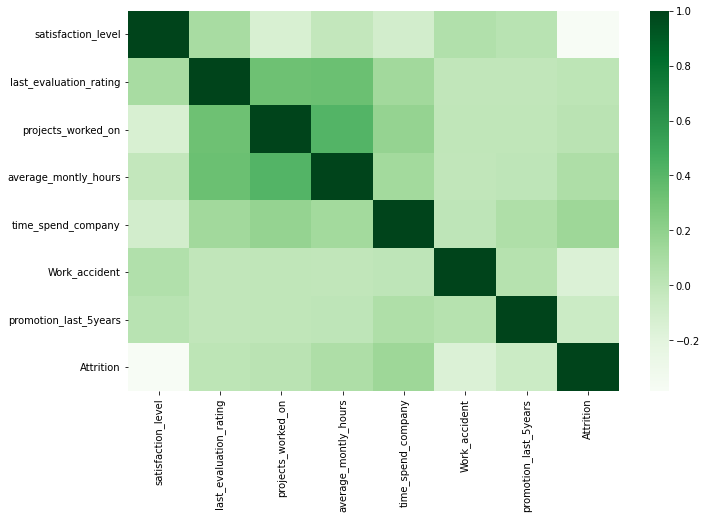

In [7]:
plt.figure(figsize=(11,7))
sns.heatmap(dataset.corr(),cmap='Greens')

In [8]:
cat=(dataset.dtypes=='object')
cat_col=list(cat[cat].index)
print(cat_col)

['Department', 'salary']


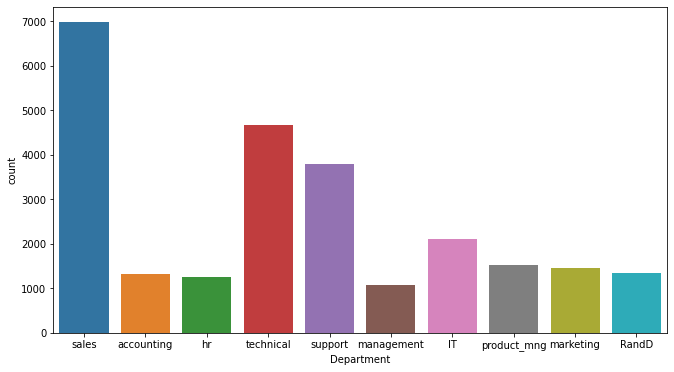

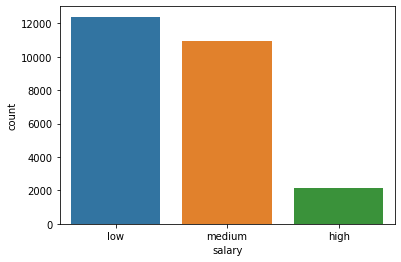

In [9]:
cat=dataset[['Department','salary']]
plt.figure(figsize=(11,6))
for i in cat:
  sns.countplot(dataset[i])
  plt.show()
  

**Bar chart for employee salary level and the frequency of turnover**

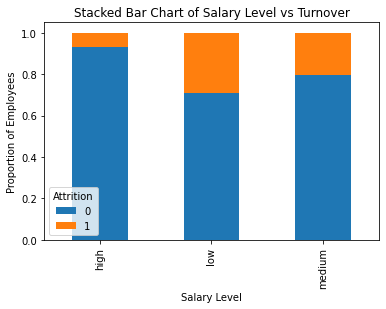

In [10]:
table=pd.crosstab(dataset.salary, dataset.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')


**Bar chart for department employee work for and the frequency of turnover**

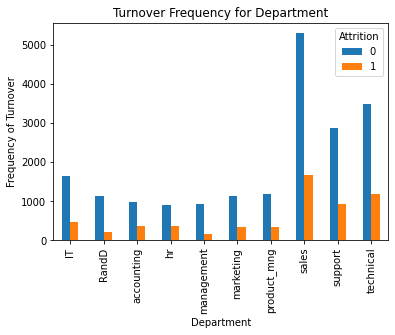

In [11]:
pd.crosstab(dataset['Department'],dataset['Attrition']).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

In [12]:
num_bins=(dataset.dtypes!='object')
num=list(num_bins[num_bins].index)
print(num)

['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Attrition']


In [13]:
num_bins=dataset[['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Attrition']]

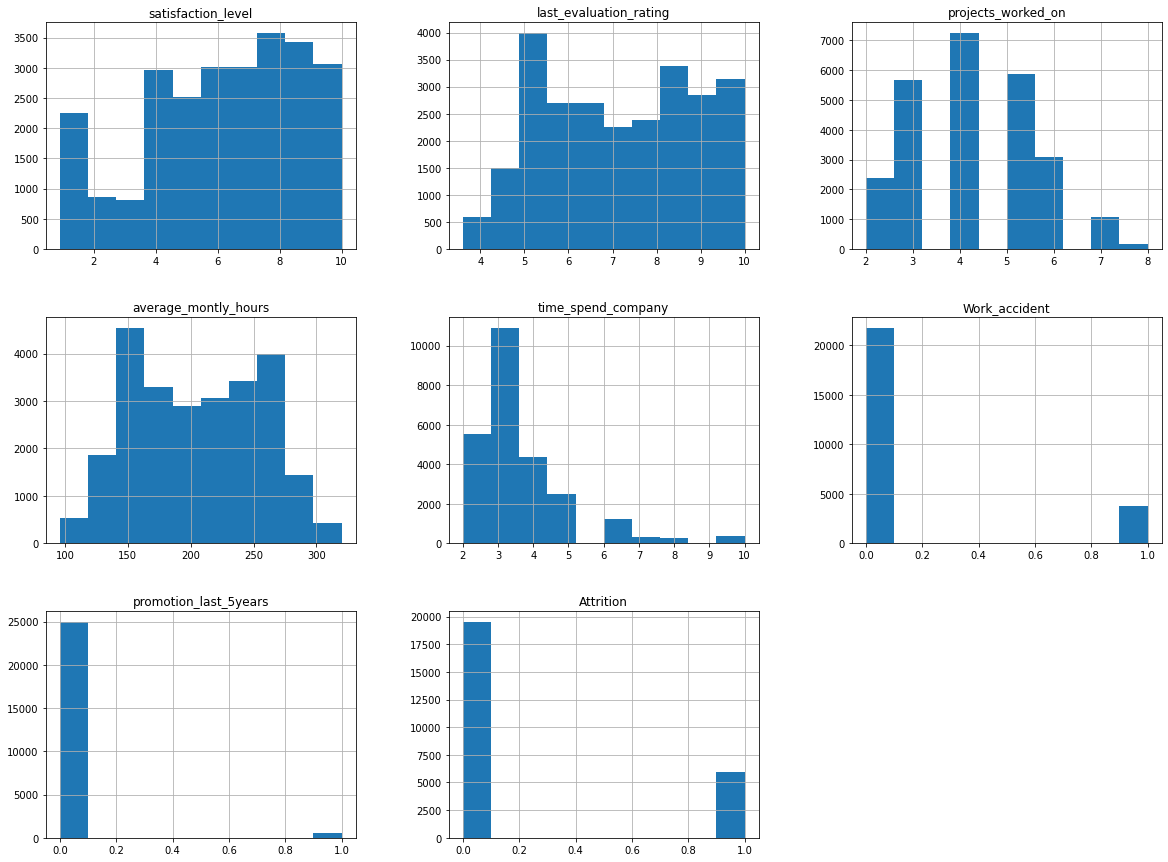

In [14]:
num_bins = 10
dataset.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

In [15]:
x=dataset.drop(['Attrition'],axis=1)
y=dataset[['Attrition']]

In [16]:
x=pd.get_dummies(x)
x.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,3.8,5.3,3,167,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,8.0,8.6,6,272,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.1,8.8,8,282,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,3.7,5.2,3,169,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4.1,5.0,3,163,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2)

In [18]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(xtrain,ytrain)

LogisticRegression()

In [19]:
y_pred=lr_model.predict(xtest)

In [20]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

In [21]:
print("score is {:.2f}%".format(accuracy_score(ytest,y_pred)*100))

score is 78.23%


In [22]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3859
           1       0.59      0.33      0.43      1240

    accuracy                           0.78      5099
   macro avg       0.70      0.63      0.65      5099
weighted avg       0.76      0.78      0.76      5099



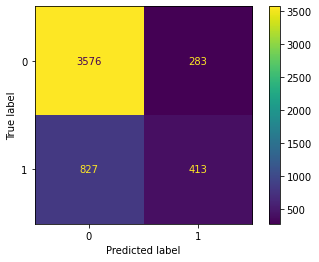

In [23]:
plot_confusion_matrix(lr_model,xtest,ytest)

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
score=cross_val_score(estimator=lr_model,X=xtrain,y=ytrain,cv=10)


In [26]:
print("accuracy {:.2f}%".format(score.mean()*100))

accuracy 79.26%


In [27]:
print("Standard deviation {:.2f}%".format(score.std()*100))

Standard deviation 0.71%


In [28]:
from sklearn.tree import DecisionTreeClassifier
dte=DecisionTreeClassifier()
dte.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [29]:
y_pred2=dte.predict(xtest)

In [30]:
print("accuracy is {:.2f}%".format(accuracy_score(ytest,y_pred2)*100))

accuracy is 98.25%


In [31]:
score=cross_val_score(estimator=dte,X=xtrain,y=ytrain,cv=10)

In [32]:
print("Accuracy={:.2f}%".format(score.mean()*100))
print("Standard Deviation ={:.2f}%".format(score.std()*100))

Accuracy=98.19%
Standard Deviation =0.32%


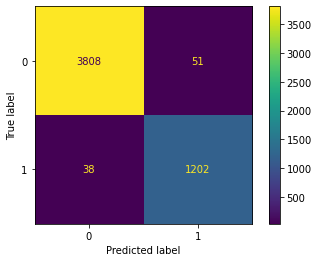

In [33]:
plot_confusion_matrix(dte,xtest,ytest)

In [34]:
print(classification_report(ytest,y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3859
           1       0.96      0.97      0.96      1240

    accuracy                           0.98      5099
   macro avg       0.97      0.98      0.98      5099
weighted avg       0.98      0.98      0.98      5099



In [35]:
from sklearn.ensemble import RandomForestClassifier
rfe=RandomForestClassifier(n_estimators=10)
rfe.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10)

In [36]:
y_pred3=rfe.predict(xtest)

In [80]:
score=cross_val_score(estimator=rfe,X=xtrain,y=ytrain,cv=10)

In [81]:
print("Model accuracy {:.2f}%".format(accuracy_score(ytest,y_pred3)*100))
print("accuracy ={:.2f}%".format(score.mean()*100))
print("Standard Deviation ={:.2f}%".format(score.std()*100))

Model accuracy 98.90%
accuracy =98.78%
Standard Deviation =0.23%


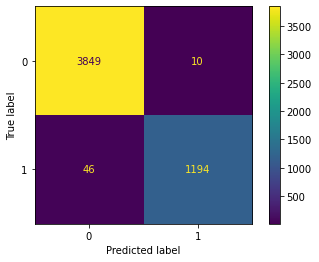

In [39]:
plot_confusion_matrix(rfe,xtest,ytest)

In [40]:
print(classification_report(ytest,y_pred3))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3859
           1       0.99      0.96      0.98      1240

    accuracy                           0.99      5099
   macro avg       0.99      0.98      0.98      5099
weighted avg       0.99      0.99      0.99      5099



In [41]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(xtrain, ytrain)

SVC()

In [42]:
y_pred4=svc.predict(xtest)

In [43]:
score=cross_val_score(estimator=svc,X=xtrain,y=ytrain,cv=10)

In [44]:
print("Model accuracy ={:.2f}%".format(accuracy_score(ytest,y_pred4)*100))
print("Accuracy ={:.2f}%".format(score.mean()*100))
print("Standard deviation ={:.2f}%".format(score.std()*100))

Model accuracy =78.76%
Accuracy =79.75%
Standard deviation =0.25%


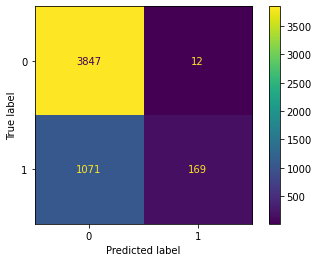

In [45]:
print(plot_confusion_matrix(svc,xtest,ytest))

In [46]:
print(classification_report(ytest,y_pred4))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      3859
           1       0.93      0.14      0.24      1240

    accuracy                           0.79      5099
   macro avg       0.86      0.57      0.56      5099
weighted avg       0.82      0.79      0.72      5099



In [47]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(xtrain, ytrain)

XGBClassifier()

In [48]:
y_pred5=xgb.predict(xtest)

In [49]:
score=cross_val_score(estimator=xgb,X=xtrain,y=ytrain,cv=10)

In [50]:
print("Model accuracy ={:.2f}%".format(accuracy_score(ytest,y_pred5)*100))
print("Accuracy ={:.2f}%".format(score.mean()*100))
print("Standard deviation ={:.2f}%".format(score.std()*100))

Model accuracy =97.10%
Accuracy =97.31%
Standard deviation =0.51%


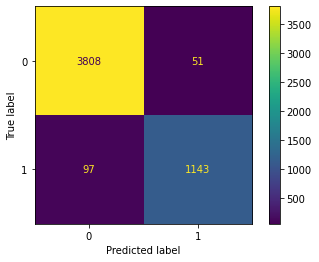

In [51]:
plot_confusion_matrix(xgb,xtest,ytest)

In [52]:
print(classification_report(ytest,y_pred5))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3859
           1       0.96      0.92      0.94      1240

    accuracy                           0.97      5099
   macro avg       0.97      0.95      0.96      5099
weighted avg       0.97      0.97      0.97      5099



In [53]:
accuracy_lr=accuracy_score(ytest,y_pred)*100
accuracy_dte=accuracy_score(ytest,y_pred2)*100
accuracy_rfe=accuracy_score(ytest,y_pred3)*100
accuracy_svc=accuracy_score(ytest,y_pred4)*100
accuracy_xgb=accuracy_score(ytest,y_pred5)*100

Text(0.5, 1.0, 'Accuracy for each model')

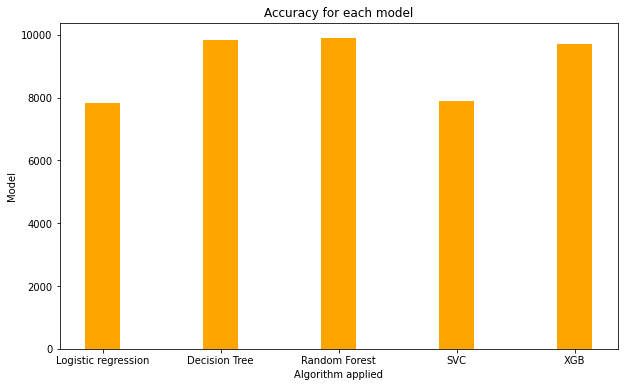

In [54]:
algos=['Logistic regression','Decision Tree','Random Forest','SVC','XGB']
accuracy=[accuracy_lr,accuracy_dte,accuracy_rfe,accuracy_svc,accuracy_xgb]
accuracy=np.floor([i*100 for i in accuracy])

fig=plt.figure(figsize=(10,6))
plt.bar(algos,accuracy,color='orange',width=.3)
plt.xlabel("Algorithm applied")
plt.ylabel("Model")
plt.title("Accuracy for each model")

In [55]:
import pickle

## Saving model to disk

In [56]:
pickle.dump(rfe,open('model.pkl','wb'))

## **Loading model to compare the results**

In [57]:
model=pickle.load(open('model.pkl','rb'))

# **Select 5 best features using SelectKBest**

In [58]:
from sklearn.feature_selection import chi2, SelectKBest

In [60]:
best=SelectKBest(score_func=chi2,k=10)
fit=best.fit(x,y)

In [61]:
scores=pd.DataFrame(fit.scores_)

In [65]:
fit.scores_

array([3.81522230e+03, 7.88062374e-01, 5.77911054e+00, 1.76077981e+03,
       3.33274245e+02, 5.19575818e+02, 1.06626107e+02, 1.69555697e+00,
       4.92386927e+01, 7.02263119e+00, 1.67849731e+01, 5.93867507e+01,
       2.38788669e-01, 2.25380146e+00, 1.05991971e+00, 2.55982478e+00,
       1.02636541e+01, 3.34555440e+02, 2.23854538e+02, 6.17750674e+01])

In [74]:
feature=pd.DataFrame(x.columns)

In [75]:
score=pd.concat([feature,scores],axis=1)
score.columns=['Col','Score']
score.sort_values(by='Score',ascending=False)

,Col,Score
0,satisfaction_level,3815.222298
3,average_montly_hours,1760.779810
5,Work_accident,519.575818
17,salary_high,334.555440
4,time_spend_company,333.274245
18,salary_low,223.854538
6,promotion_last_5years,106.626107
19,salary_medium,61.775067
11,Department_management,59.386751
8,Department_RandD,49.238693


In [78]:
print(score.nlargest(5,'Score'))

                     Col        Score
0     satisfaction_level  3815.222298
3   average_montly_hours  1760.779810
5          Work_accident   519.575818
17           salary_high   334.555440
4     time_spend_company   333.274245


# ***Feature Importance***
*You can get the feature importance of each feature of your dataset by using the feature importance property of the model.*

In [82]:
rfe.feature_importances_

array([0.31854997, 0.13014889, 0.13811293, 0.16723239, 0.19256586,
       0.01184372, 0.00218207, 0.00165803, 0.0015228 , 0.00158411,
       0.00205816, 0.00235435, 0.00136488, 0.00131809, 0.0042806 ,
       0.00322779, 0.0041959 , 0.00502643, 0.0078032 , 0.00296981])

In [112]:
imp=pd.DataFrame({'Score':rfe.feature_importances_},index=[x.columns])
imp

,Score
satisfaction_level,0.318550
last_evaluation_rating,0.130149
projects_worked_on,0.138113
average_montly_hours,0.167232
time_spend_company,0.192566
Work_accident,0.011844
promotion_last_5years,0.002182
Department_IT,0.001658
Department_RandD,0.001523
Department_accounting,0.001584


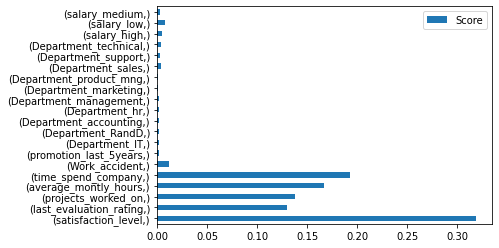

In [115]:
imp.plot(kind='barh')

In [119]:
sc=pd.DataFrame(rfe.feature_importances_)
col=pd.DataFrame(x.columns)
imp=pd.concat([col,sc],axis=1)
imp.columns=['features','score']
imp.sort_values(by='score',ascending=False)

,features,score
0,satisfaction_level,0.318550
4,time_spend_company,0.192566
3,average_montly_hours,0.167232
2,projects_worked_on,0.138113
1,last_evaluation_rating,0.130149
5,Work_accident,0.011844
18,salary_low,0.007803
17,salary_high,0.005026
14,Department_sales,0.004281
16,Department_technical,0.004196


In [120]:
print(imp.nlargest(5,'score'))

                 features     score
0      satisfaction_level  0.318550
4      time_spend_company  0.192566
3    average_montly_hours  0.167232
2      projects_worked_on  0.138113
1  last_evaluation_rating  0.130149


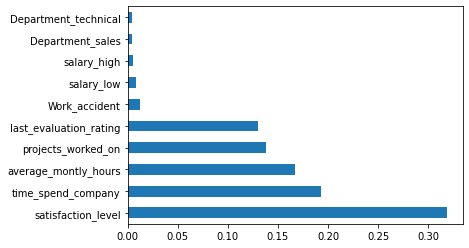

In [107]:
imp2=pd.Series(rfe.feature_importances_,index=x.columns)
imp2.nlargest(10).plot(kind='barh')
plt.show()